<a href="https://colab.research.google.com/github/joezerr/Project/blob/main/Abalone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
url = ("https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data")

In [ ]:
abalone = pd.read_csv(url, header=None)

In [ ]:
abalone.head()

,0,1,2,3,4,5,6,7,8
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [ ]:
abalone.columns = ['Sex','Length','Diameter','Height','Whole weight','Shucked weight','Viscera weight','Shell weight','Rings']

In [ ]:
abalone.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [ ]:
abalone = abalone.drop("Sex",axis=1)

In [ ]:
import matplotlib.pyplot as plt

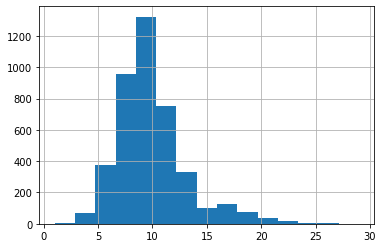

In [ ]:
abalone["Rings"].hist(bins=15)

In [ ]:
correlation_matrix = abalone.corr()

In [ ]:
correlation_matrix["Rings"]

Length            0.556720
Diameter          0.574660
Height            0.557467
Whole weight      0.540390
Shucked weight    0.420884
Viscera weight    0.503819
Shell weight      0.627574
Rings             1.000000
Name: Rings, dtype: float64

In [ ]:
import numpy as np
>>> a = np.array([2, 2])
>>> b = np.array([4, 4])
>>> np.linalg.norm(a - b)

2.8284271247461903

In [ ]:
X = abalone.drop("Rings", axis=1)
X = X.values

In [ ]:
y = abalone["Rings"]
y = y.values

In [ ]:
new_data_point = np.array([
     0.569552,
     0.446407,
     0.154437,
     1.016849,
     0.439051,
     0.222526,
     0.291208,
 ])

In [ ]:
distances = np.linalg.norm(X - new_data_point, axis=1)

In [ ]:
k=3
nearest_neighbours_ids = distances.argsort()[:k]

In [ ]:
nearest_neighbours_ids

array([4045, 1902, 1644])

In [ ]:
nearest_neighbours_rings = y[nearest_neighbours_ids]

In [ ]:
nearest_neighbours_rings

array([ 9, 11, 10])

regression

In [ ]:
prediction = nearest_neighbours_rings.mean()

In [ ]:
prediction

10.0

In [ ]:
import scipy.stats
class_neighbours = np.array(["A","B","B","C"])
scipy.stats.mode(class_neighbours)

ModeResult(mode=array(['B'], dtype='<U1'), count=array([2]))

scikit knn

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=12345)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
knn_model = KNeighborsRegressor(n_neighbors=3)

In [ ]:
knn_model.fit(X,y)

KNeighborsRegressor(n_neighbors=3)

rmse

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt

train_preds = knn_model.predict(X_train)
mse = mean_squared_error(y_train,train_preds)
rmse = sqrt(mse)
rmse

1.6691590662446218

In [ ]:
test_preds = knn_model.predict(X_test)
mse = mean_squared_error(y_test,test_preds)
rmse1 = sqrt(mse)
rmse1

1.668499789346538

plotting

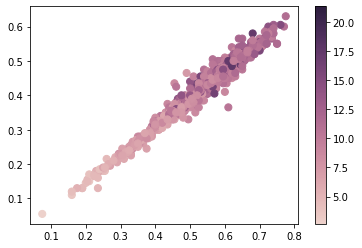

In [ ]:
>>> import seaborn as sns
>>> cmap = sns.cubehelix_palette(as_cmap=True)
>>> f, ax = plt.subplots()
>>> points = ax.scatter(
...     X_test[:, 0], X_test[:, 1], c=test_preds, s=50, cmap=cmap
... )
>>> f.colorbar(points)
>>> plt.show()

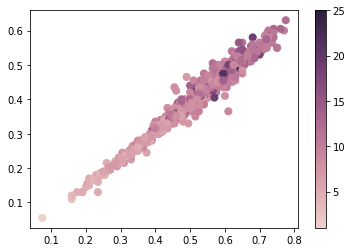

In [ ]:
>>> cmap = sns.cubehelix_palette(as_cmap=True)
>>> f, ax = plt.subplots()
>>> points = ax.scatter(
...     X_test[:, 0], X_test[:, 1], c=y_test, s=50, cmap=cmap
... )
>>> f.colorbar(points)
>>> plt.show()

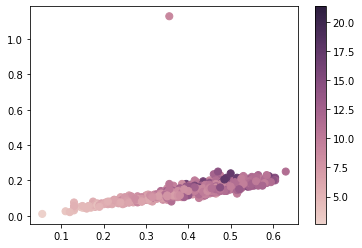

In [ ]:
>>> cmap = sns.cubehelix_palette(as_cmap=True)
>>> f, ax = plt.subplots()
>>> points = ax.scatter(
...     X_test[:, 1], X_test[:, 2], c=test_preds, s=50, cmap=cmap
... )
>>> f.colorbar(points)
>>> plt.show()

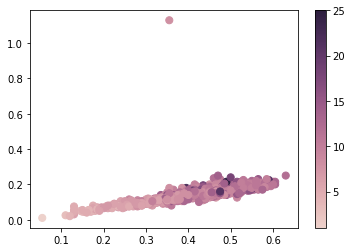

In [ ]:
>>> cmap = sns.cubehelix_palette(as_cmap=True)
>>> f, ax = plt.subplots()
>>> points = ax.scatter(
...     X_test[:, 1], X_test[:, 2], c=y_test, s=50, cmap=cmap
... )
>>> f.colorbar(points)
>>> plt.show()